# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services_Part3


In [1]:
# import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.externals import joblib

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, learning_curve, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier as ADB, RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR

from xgboost import XGBClassifier as XGB, XGBRegressor as XGBR

# to get rid of jupyter notebook warnings
import warnings
warnings.simplefilter('ignore')

# magic word for producing visualizations in notebook
%matplotlib inline

C:\Users\Osarugue Egharevba\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Part 4: Supervised Learning


In [2]:
# load in the clean mailout train and test data
mailout_train = pd.read_csv("./data/mailout_train_cleaned.csv")
X = joblib.load("./model/mailout_train_trans.pkl")
mailout_test = pd.read_csv("./data/mailout_test_cleaned.csv")
mailout_test_trans = joblib.load("./model/mailout_test_trans.pkl")

In [3]:
# get y off mailout_train data
y = mailout_train["RESPONSE"]

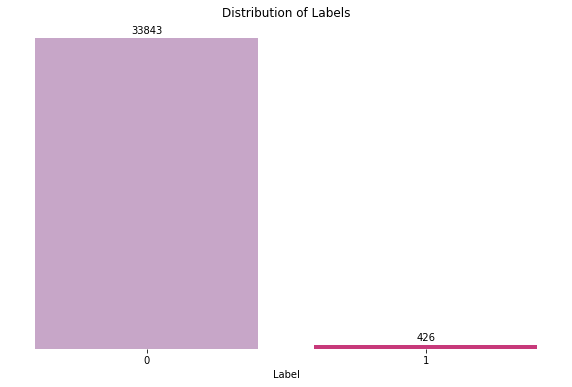

In [4]:
# plot distplot to show class imbalance in y
y_count = mailout_train[["LNR", "RESPONSE"]].groupby(by="RESPONSE").count()
plt.figure(figsize=(10, 6))
ax = sns.countplot(y, palette="PuRd")
plt.xlabel("Clusters")
plt.xlabel("Label")
plt.title("Distribution of Labels")
for index, row in y_count.iterrows():
    ax.text(row.name, row.LNR + 500, row.LNR, color='black', ha="center")
ax.axes.get_yaxis().set_visible(False)
plt.box(on=None)

In [5]:
# split with stratifiedkfold. using 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# function to fit, predict and evaluate model
def evaluate_model(name, X, y, model):
    """
    INPUT:
    - name : friendly name of Classification model (string)
    - X : array of features
    - y : true label
    - model : initialised Classification model
    
    OUTPUT:
    - train_scores_mean : mean of training scores
    - test_scores_mean : mean of testing scores
    - fit_times_mean : mean of training model time
    - score_times_mean : mean of testing model time
    
    DESCRIPTION:
    This function does the following:
    - uses stratifiedkfold to split model into training and test sets
    - fits and predicts score using "roc_auc"
    - uses learning_curve to output the train / test score and time for different train size
    - plots both the Learning curve rate and timing and timing curve  
    """
    
    # cv_score = cross_val_score(model, X, y, scoring="roc_auc", cv=skf, n_jobs=-1)
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(model, X, y, cv=skf, scoring="roc_auc", 
                                                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                                                        n_jobs=-1, return_times=True)
        
    # print(train_scores, "\n")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
        
    print("\n***************************************************************************")
    print("Classifier used : ", name)
    print("***************************************************************************")
    # print("ROC_AUC score : ", cv_score.mean())
    print("ROC AUC train score = {}".format(train_scores_mean[-1].round(2)))
    print("ROC AUC test score = {}\n".format(test_scores_mean[-1].round(2)))
        
    # subplots
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    
    # Learning curve    
    plt.plot(np.linspace(0.1, 1.0, 10)*100, train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(np.linspace(0.1, 1.0, 10)*100, test_scores_mean, 'o-', color="r", label="Testing score")
    plt.grid(True)
    plt.xticks(np.linspace(0.1, 1.0, 10)*100)
    plt.title("Learning Curve of {} model".format(name))
    plt.xlabel("% of training set used")
    plt.ylabel("Model score")
    plt.legend(loc="best")
        
    # Timing curve
    plt.subplot(212)
    plt.plot(np.linspace(0.1, 1.0, 10)*100, fit_times_mean, 'o-', color="g", label="Training time")
    plt.plot(np.linspace(0.1, 1.0, 10)*100, score_times_mean, 'o-', color="r", label="Testing time")
    plt.grid(True)
    plt.xticks(np.linspace(0.1, 1.0, 10)*100)
    plt.title("Timing Curve of {} model".format(name))
    plt.xlabel("% of training set used")
    plt.ylabel("Seconds")
    plt.legend(loc="best")
    plt.subplots_adjust(bottom=0.8)
    plt.tight_layout()  
    plt.show()
        
    return train_scores_mean[-1].round(2), test_scores_mean[-1].round(2), fit_times_mean[-1], score_times_mean[-1]

In [7]:
#initialize dataframe to score model scores
model_comparison_df = pd.DataFrame(columns=["Model", "ROC_AUC_Train_score", "ROC_AUC_Test_score", "Train_time", "Test_time"])

In [8]:
# initialize all Classification models to be tested
lr = LR(solver="liblinear", random_state=42)
rf = RF(n_estimators=100, random_state=42)
adb = ADB(n_estimators=100, random_state=42)
xgb = XGB(random_state=42)

In [9]:
# create list of models to evaluate
models = [["Logistic Regression", lr], ["Random Forest", rf], ["AdaBoost", adb], ["XGB", xgb]]


***************************************************************************
Classifier used :  Logistic Regression
***************************************************************************
ROC AUC train score = 0.85
ROC AUC test score = 0.67



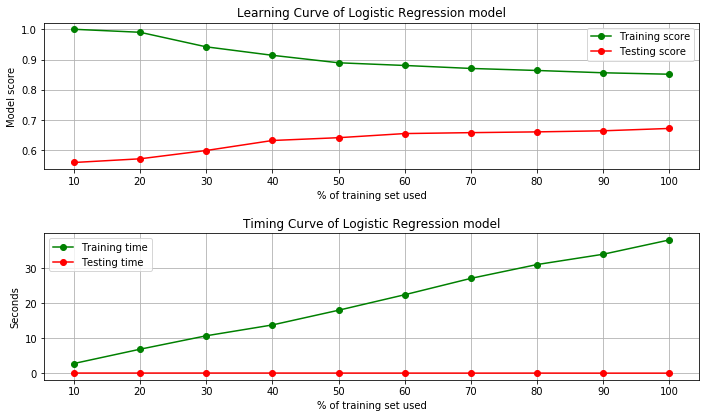


***************************************************************************
Classifier used :  Random Forest
***************************************************************************
ROC AUC train score = 1.0
ROC AUC test score = 0.62



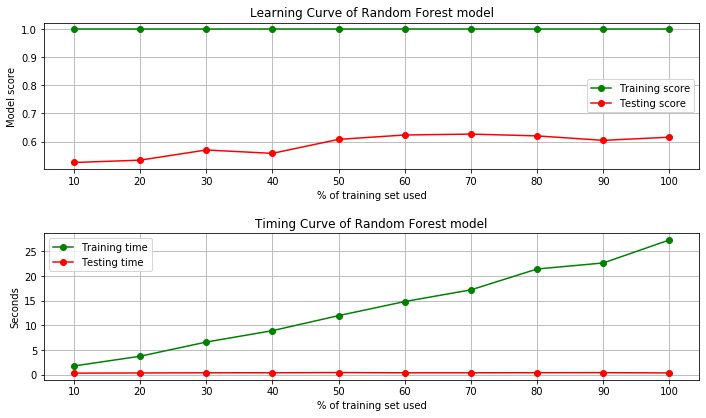


***************************************************************************
Classifier used :  AdaBoost
***************************************************************************
ROC AUC train score = 0.9
ROC AUC test score = 0.75



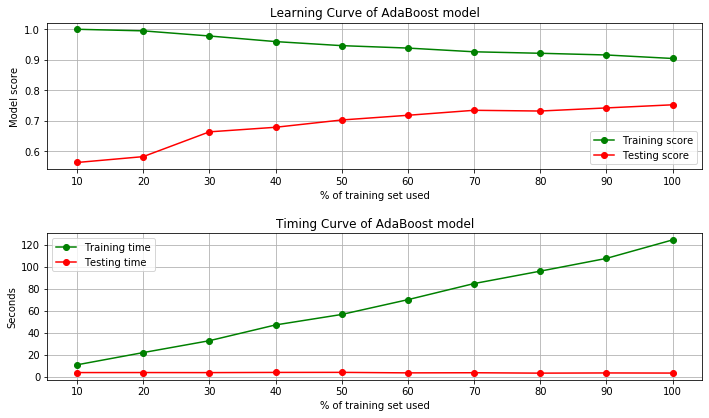


***************************************************************************
Classifier used :  XGB
***************************************************************************
ROC AUC train score = 0.93
ROC AUC test score = 0.78



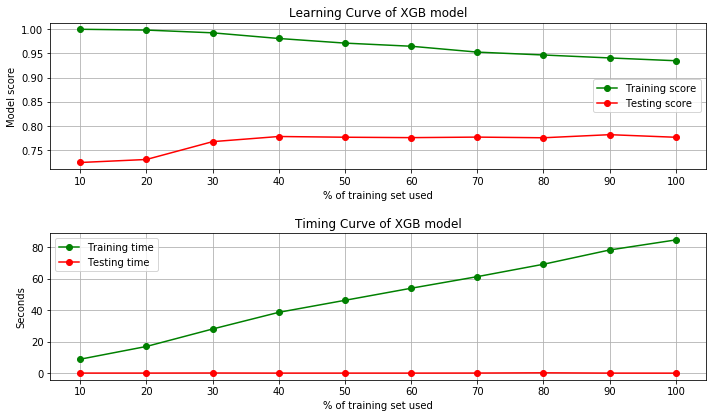

In [10]:
# run evaluate_model for each Classification model above
for i, model in enumerate(models):
    train_s, test_s, train_t, test_t  = evaluate_model(model[0], X, y, model[1])
    model_comparison_df.loc[i, "Model"] = model[0]
    model_comparison_df.loc[i, "ROC_AUC_Train_score"] = train_s
    model_comparison_df.loc[i, "ROC_AUC_Test_score"] = test_s
    model_comparison_df.loc[i, "Train_time"] = train_t
    model_comparison_df.loc[i, "Test_time"] = test_t

In [11]:
# view model_comparison_df dataframe
model_comparison_df

,Model,ROC_AUC_Train_score,ROC_AUC_Test_score,Train_time,Test_time
0,Logistic Regression,0.85,0.67,38.0772,0.0228968
1,Random Forest,1,0.62,27.2885,0.37912
2,AdaBoost,0.9,0.75,124.539,3.35193
3,XGB,0.93,0.78,84.4946,0.171859


In [12]:
# use gridsearchcv to get better results for XGB
# I did not exhaust possible parameters because of computation limitations on my laptop
xgb = XGB(eval_metric="auc", silent=1, njobs=-1, objective = "binary:logistic")
params = {"learning_rate": (0.001, 0.01, 0.1),
        "max_depth": (2, 5),
        "min_child_weight": (6, 8, 10),
        "gamma": (0.0, 1.0),
        "subsample": (0.5, 1.0),
        "colsample_bytree": (0.5, 1.0),
        "n_estimators": (200, 300),
        "scale_pos_weight": (30,50)}

In [13]:
# initialize gridsearch cv
clf = GridSearchCV(xgb, param_grid=params, scoring="roc_auc", cv=skf, verbose=2, n_jobs=-1)

In [14]:
# run gridsearch cv
# this takes a long time to run
cv = clf.fit(X, y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 117.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 216.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 347.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 504.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 766.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 1063.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 1218.6min finished


In [15]:
# view best parameters
cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 8,
 'n_estimators': 200,
 'scale_pos_weight': 50,
 'subsample': 0.5}

In [16]:
# view best score
cv.best_score_

0.7868082416658376

## Part 5: Kaggle Submission
Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [17]:
# predict on mailout_test data
response = cv.predict(mailout_test_trans)

In [30]:
# create kaggle dataframe
kaggle_df = pd.DataFrame({"LNR": mailout_test["LNR"], "RESPONSE": response})

In [19]:
#save to csv
kaggle_df.to_csv("./data/kaggle_predictions.csv", header=True, index=False)

In [20]:
# kaggle score
# my score was 0.67592 at position 138

#####  Try to get better scores

In [22]:
# Use XGBRegressor
xgb2 = XGBR(objective = "binary:logistic", max_depth = 2, min_child_weight = 8, learning_rate = 0.1, 
                               subsample = 0.5, gamma = 1.0, scale_pos_weight = 50, random_state = 42, n_estimators = 200, 
                               scoring = "roc_auc", n_jobs=-1)

In [23]:
# get CV score to see if there is an improvement
cv_score = cross_val_score(xgb2, X, y, scoring="roc_auc", cv=skf, n_jobs=-1)
cv_score

array([0.75948311, 0.79434446, 0.76306171, 0.79143988, 0.76112676])

In [25]:
# since there is an improvement, refit
cv2 = xgb2.fit(X, y)

In [26]:
# re-predict
response2 = cv2.predict(mailout_test_trans)

In [27]:
# create kaggle dataframe 2
kaggle_df2 = pd.DataFrame({"LNR": mailout_test["LNR"], "RESPONSE": response2})

In [29]:
#save to csv
kaggle_df2.to_csv("./data/kaggle_predictions2.csv", header=True, index=False)

In [ ]:
# kaggle score
# my score was 0.77110 at position 106